In [ ]:
import numpy as np
import pandas as pd

# Read the data from the CSV file into a DataFrame
df = pd.read_csv('/content/combined_data.csv')

# Function to preprocess the DataFrame and convert comma-separated numbers to float
def preprocess_dataframe(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.replace(',', '').astype(float)
    return df

# Preprocess the DataFrame to remove commas and convert to float
df = preprocess_dataframe(df)

# Common x_values
x_values=np.array(df['Year'])
# Function to fill missing values in a column using polynomial regression with degree 3
def fill_missing_values(column, x_values):
    # Filter out the valid data points (non-NaN values)
    valid_indices = ~column.isnull()
    x_valid = x_values[valid_indices]
    y_valid = column[valid_indices]

    # Perform polynomial regression with degree 3
    coefficients = np.polyfit(x_valid, y_valid, 3)
    y_pred = np.polyval(coefficients, x_values)

    # Fill the NaN values in the column with the predicted values
    column[column.isnull()] = y_pred[column.isnull()]

    return column

# Iterate through all columns (excluding the 'Year' column)
for col in df.columns:
    if col != 'Year':
        df[col] = fill_missing_values(df[col], x_values)
pd.options.display.float_format = '{:.2f}'.format
# Display the DataFrame with filled NaN values
print(df.head(-14))

    Year  expenditure, percent of GDP (% of GDP)  GDP per capita  \
0   1995                                   24.55             374   
1   1996                                   23.94             400   
2   1997                                   24.80             415   
3   1998                                   25.59             413   
4   1999                                   25.40             441   
5   2000                                   25.64             442   
6   2001                                   27.79             450   
7   2002                                   28.61             469   
8   2003                                   29.43             544   
9   2004                                   27.96             624   
10  2005                                   26.43             711   
11  2006                                   26.66             802   
12  2007                                   26.47            1023   

    poverty indicator  Corporate Tax   Personal

<ipython-input-22-347e91d2b21f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = y_pred[column.isnull()]


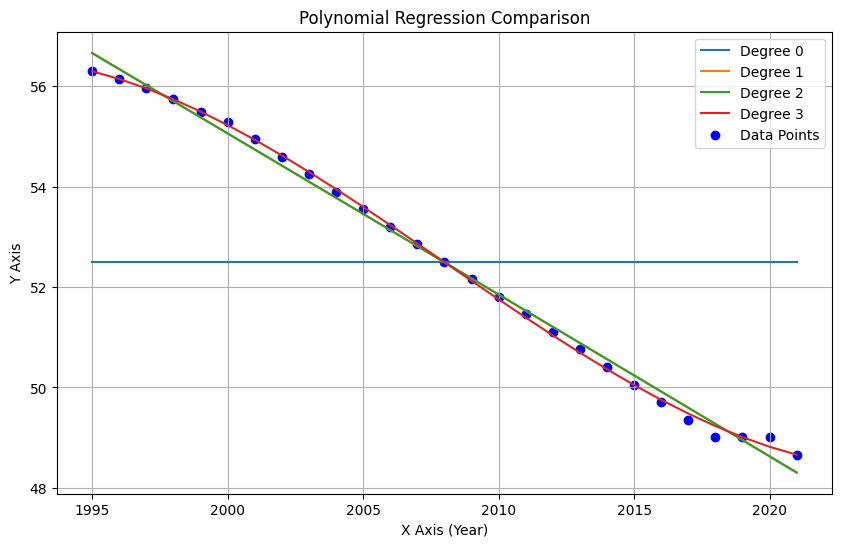

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_values = df['poverty indicator']
# Transform x_values to be relative to the minimum year
x_transformed = x_values - np.min(x_values)
# Filter out the valid data points (non-NaN values)
valid_indices = ~np.isnan(y_values)
x_valid = x_transformed[valid_indices]
y_valid = y_values[valid_indices]

# Create a single figure to compare different polynomials
plt.figure(figsize=(10, 6))

for i in range(4):
    degree = i
    coefficients = np.polyfit(x_valid, y_valid, degree)

    # Predict the y-values for all x-values (including the missing ones)
    y_pred = np.polyval(coefficients, x_transformed)

    # Plot the data points and polynomial curve
    plt.plot(x_values, y_pred, label=f'Degree {degree}')

# Plot the data points as blue scatter points (common for all polynomials)
plt.scatter(x_values, y_values, color='blue', label='Data Points')

plt.xlabel('X Axis (Year)')
plt.ylabel('Y Axis')
plt.title('Polynomial Regression Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.to_csv('filled_data.csv', index=False)